In [5]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

from climate_indices import indices,compute
from climate_indices.indices import Distribution

import PCA_functions as pf

In [6]:
#from tigramite.tigramite.plotting import plot_graph
from tigramite.tigramite import plotting as tp
from tigramite.tigramite.pcmci import PCMCI
from tigramite.tigramite.independence_tests import ParCorr
import tigramite.tigramite.data_processing as pp

# Precipitation dataset

In [25]:
data = np.load('data.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')

In [26]:
result = []
index = []
lat_list = []
lon_list =[]

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if not data[i,j,-1]<0:
        #if not np.isnan(data[i,j,-1]):
            result.append(data[i,j,:])
            index.append((lon[i],lat[j]))
            lon_list.append(lon[i])
            lat_list.append(lat[j])

# Distribution

In [79]:
import seaborn as sns
import scipy.stats as st

In [ ]:
result = np.matrix(result)
result = result.transpose()
data = pd.DataFrame(result)

In [80]:
idx = np.arange(1,841,12)

In [111]:
y, x = np.histogram(d, bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

In [114]:
params = st.norm.fit(d)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

# Calculate fitted PDF and error with fit in distribution
pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)
sse = np.sum(np.power(y - pdf, 2.0))

In [115]:
sse

0.12980689358964134

In [133]:
d = data.iloc[:,0].values

AttributeError: 'matrix' object has no attribute 'iloc'

In [132]:
idx = np.arange(6,841,12)
d = d[idx]
_,p = best_fit_distribution(d)

IndexError: index 78 is out of bounds for axis 0 with size 70

In [123]:
p[0]*p[2]

19.120460614958972

In [119]:
d.mean()

8.908

('gamma', (0.4533251881854278, -1.249533974232933e-27, 62.45260106351206))

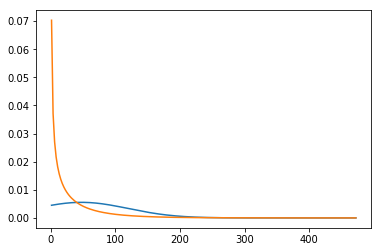

In [130]:
data = result[100,:]
best_fit_distribution(data)

In [131]:
st.gamma.fit(data)

(0.4533251881854278, -1.249533974232933e-27, 62.45260106351206)

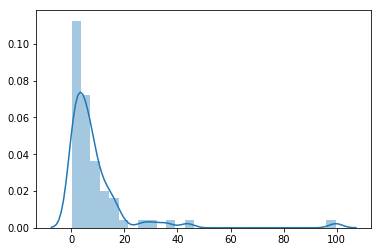

In [129]:
sns.distplot(d);

array([ 2.46,  1.54,  1.1 ,  5.82,  4.56,  6.67, 12.61, 12.71, 13.59,
       99.67,  9.21,  5.29, 11.96, 26.82, 10.53, 31.03,  2.36,  9.06,
       43.7 ,  4.32,  0.17,  0.36,  3.53, 19.11,  6.76,  0.61,  0.16,
        1.64,  5.96, 15.26,  1.19,  0.13,  3.52, 15.85,  1.96, 10.44,
        0.84,  0.21,  9.06,  7.69,  1.49,  0.42,  0.82,  0.67, 16.71,
        0.42,  6.53,  7.12,  6.42,  8.42,  6.35,  6.47,  3.53, 13.91,
        9.91,  4.16,  3.62,  6.04,  6.73,  9.81, 16.05,  3.81, 35.96,
        7.14,  3.45,  3.63,  4.76,  3.25,  3.25,  3.25], dtype=float32)

# PCA

In [27]:
result = pf.deseasonalize(np.array(result))
n_components = 4

result = np.matrix(result)
result = result.transpose()
data = pd.DataFrame(result)

scale = StandardScaler()
scaled_data = scale.fit_transform(data)

pca = PCA(n_components=n_components)
pca_model = pca.fit(scaled_data)

#pca_data = pca_model.transform(data)

#Matrix = pd.DataFrame(pca_model.components_)
#Matrix1 = np.transpose(Matrix)

Matrix = np.transpose(pca_model.components_)
#Matrix1 = Matrix1/Matrix1.sum(axis=0)
Matrix = Matrix/Matrix.sum(axis=0)
#Matrix, R, indx = orthomax(Matrix)


loading = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading = pd.DataFrame(Matrix)
#loading = loading.abs()
#loading = loading/loading.sum()

In [28]:
clusters = loading.idxmax(axis=1)
df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clusters.values.tolist()})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"].vlues = lon_temp

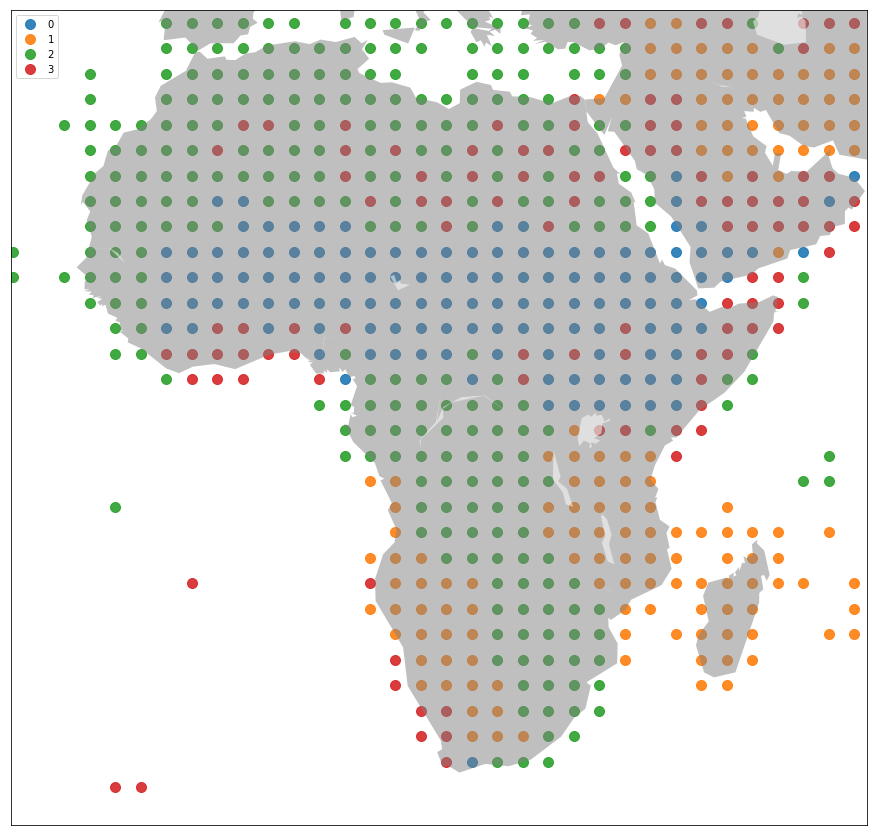

In [29]:
df_list = []
for j in range(n_components):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)


for i in range(n_components):
    values = df["clusters"].values  
    Idx = np.where(values == i)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=100, label = i)

    
plt.legend()
plt.show()

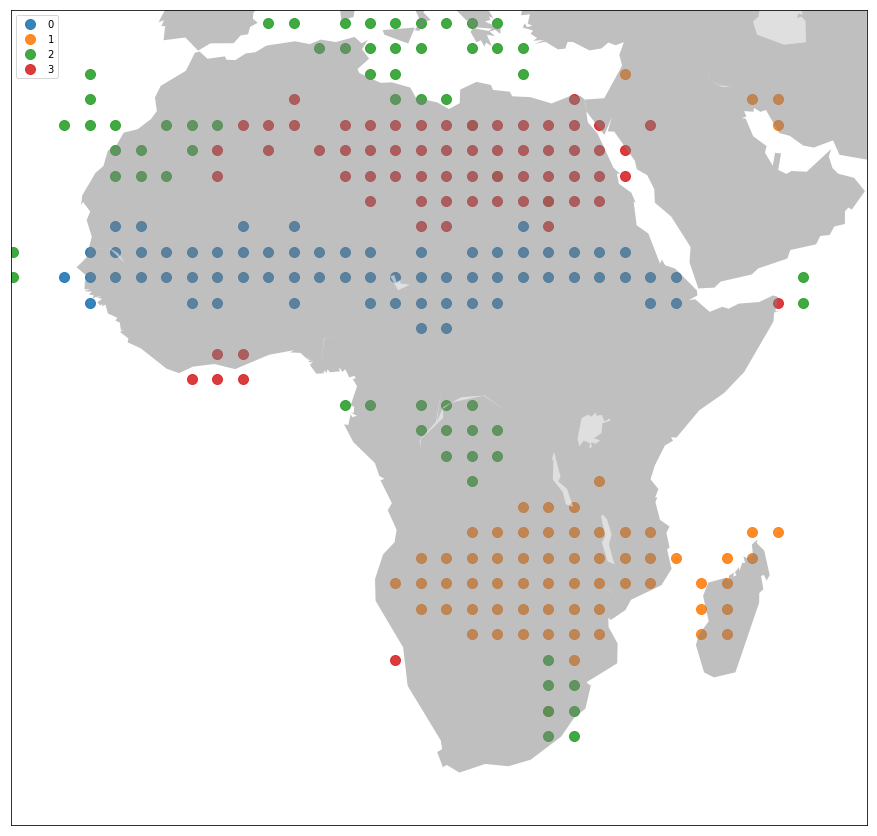

In [30]:
df_list = []
for j in range(n_components):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)

limit = 0.9

for i in range(n_components):
    values,Idx = pf.index_finder_percentile(loading,i, percentile= limit)
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=100, label = i)

    
plt.legend()
plt.show()

In [31]:
var_names = loading.columns
result = result.dot(loading)
result = np.matrix(result)

In [32]:
dataframe = pp.DataFrame(result,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [33]:
results = pcmci.run_pcmci(tau_max=5, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 13 link(s):
        (3 0): pval = 0.00000 | val = 0.538
        (0 -1): pval = 0.00000 | val = 0.480
        (1 0): pval = 0.00000 | val = -0.419
        (0 -3): pval = 0.00000 | val = -0.175
        (1 -3): pval = 0.00001 | val = -0.159
        (1 -2): pval = 0.00007 | val = -0.139
        (2 0): pval = 0.00023 | val = -0.128
        (1 -5): pval = 0.00028 | val = 0.128
        (2 -3): pval = 0.00035 | val = 0.125
        (0 -5): pval = 0.00215 | val = 0.108
        (1 -1): pval = 0.02022 | val = 0.081
        (3 -4): pval = 0.02688 | val = -0.078
        (2 -1): pval = 0.03817 | val = -0.073

    Variable 1 has 10 link(s):
        (3 0): pval = 0.00000 | val = -0.462
        (0 0): pval = 0.00000 | val = -0.419
        (1 -1): pval = 0.00000 | val = 0.329
        (1 -2): pval = 0.00000 | val = -0.212
        (0 -2): pval = 0.00000 | val = -0.206
        (3 -4): pval = 0.00000 | val = -0.191
        (0 -4): pval = 0.00000 | va

In [34]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable 0 has 10 link(s):
        (3 0): pval = 0.00000 | qval = 0.00000 | val = 0.538
        (0 -1): pval = 0.00000 | qval = 0.00000 | val = 0.480
        (1 0): pval = 0.00000 | qval = 0.00000 | val = -0.419
        (0 -3): pval = 0.00000 | qval = 0.00000 | val = -0.175
        (1 -3): pval = 0.00001 | qval = 0.00004 | val = -0.159
        (1 -2): pval = 0.00007 | qval = 0.00037 | val = -0.139
        (2 0): pval = 0.00023 | qval = 0.00023 | val = -0.128
        (1 -5): pval = 0.00028 | qval = 0.00129 | val = 0.128
        (2 -3): pval = 0.00035 | qval = 0.00155 | val = 0.125
        (0 -5): pval = 0.00215 | qval = 0.00749 | val = 0.108

    Variable 1 has 9 link(s):
        (3 0): pval = 0.00000 | qval = 0.00000 | val = -0.462
        (0 0): pval = 0.00000 | qval = 0.00000 | val = -0.419
        (1 -1): pval = 0.00000 | qval = 0.00000 | val = 0.329
        (1 -2): pval = 0.00000 | qval = 0.00000 | val = -0.212
        (0 -2): pval = 0.00

In [35]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a9af67208>)

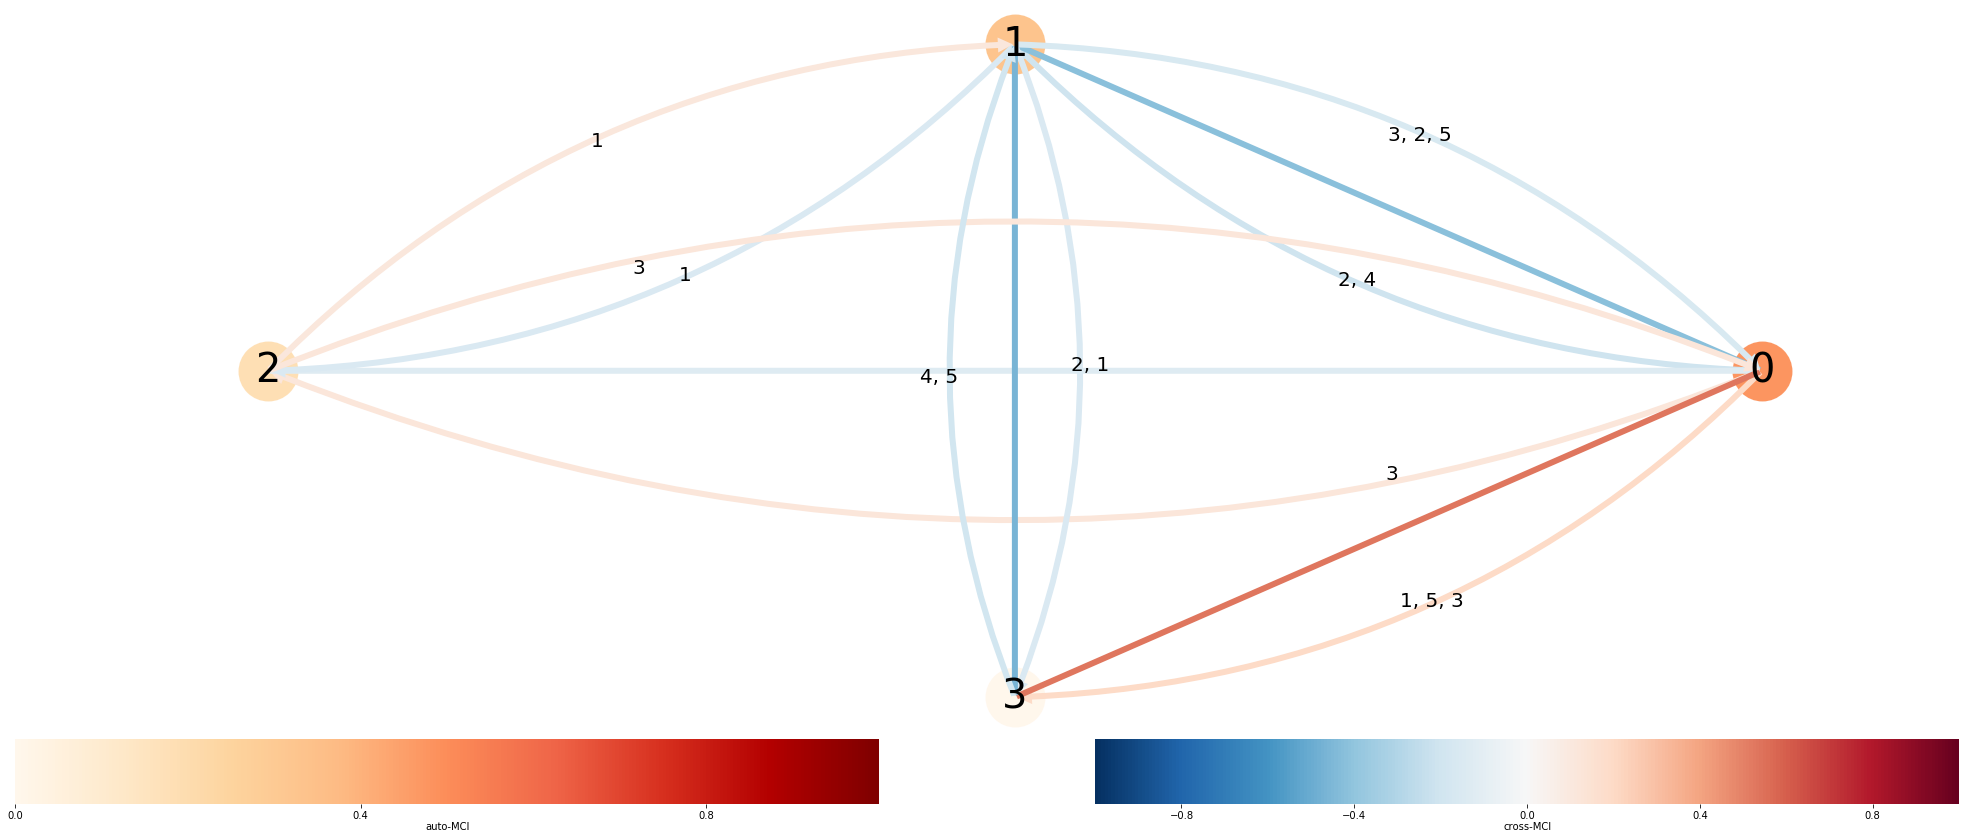

In [36]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 20,
    node_size = 60
    )

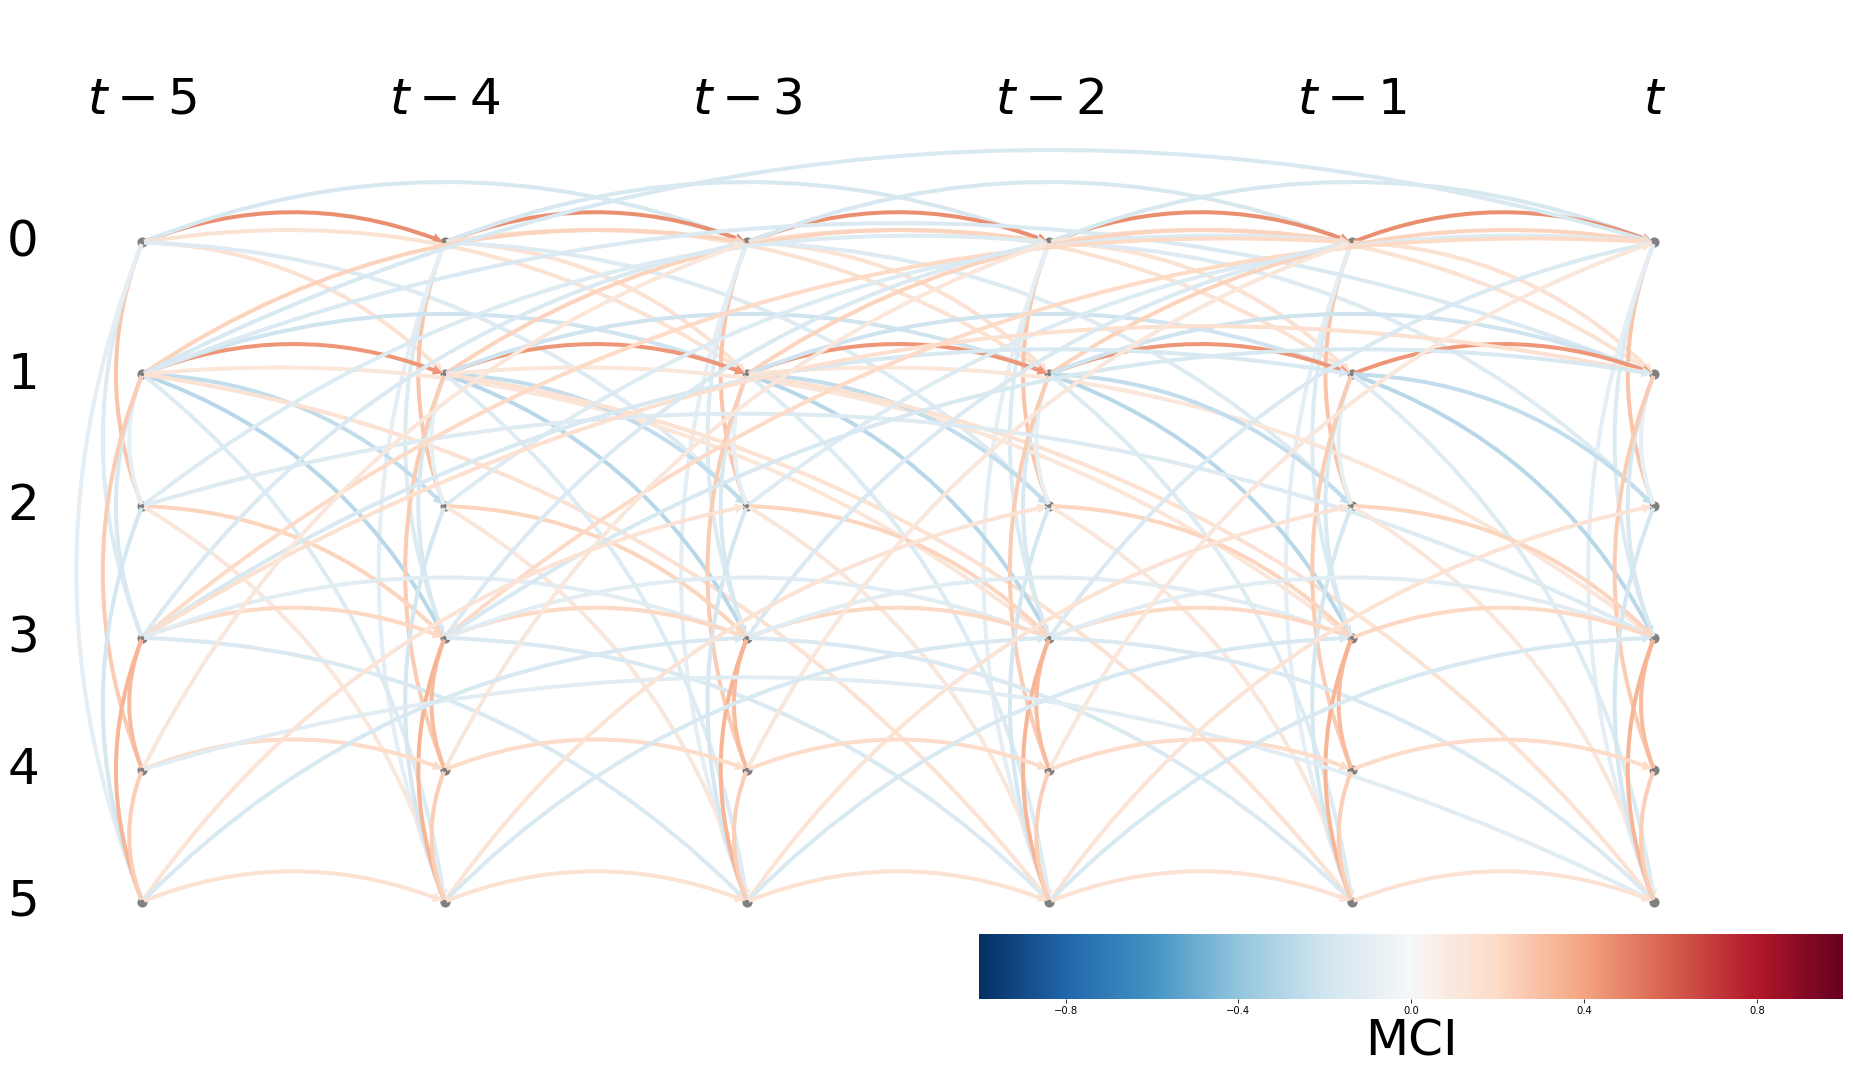

In [59]:
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='MCI',figsize=(30,15),
    node_label_size=100,
    label_fontsize = 50
    )

In [273]:
lon = np.arange(-178.75,179.0,2.5)
lat = np.arange(-88.75,89,2.5)

In [28]:
lon = np.arange(-23.75,60.0,2.5)
lat = np.arange(-40,40,2.5)

# Precipitation for World

In [18]:
f_pre = Dataset('world_precipitation.nc')
data = f_pre.variables['precip']
lon = f_pre.variables['lon'][:]
lat = f_pre.variables['lat'][:]
time = f_pre.variables['time'][:]
data = np.swapaxes(data,0,2)

In [19]:
result = []
index = []
lat_list = []
lon_list =[]
z = 0
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if not data[i,j,-1]<0:
            result.append(data[i,j,:])
            index.append((i,j))
            lon_list.append(lon[i])
            lat_list.append(lat[j])

In [20]:
n_components=7
            
result = pf.deseasonalize(np.array(result))

result = np.matrix(result)
result = result.transpose()
result = pd.DataFrame(result)

scale = StandardScaler()
scaled_data = scale.fit_transform(result)

pca = PCA(n_components=n_components)
pca_model = pca.fit(scaled_data)

#pca_data = pca_model.transform(data)

Matrix = np.transpose(pca_model.components_)
#Matrix1 = Matrix1/Matrix1.sum(axis=0)
Matrix = Matrix/Matrix.sum(axis=0)

#Matrix1 = Matrix1/Matrix1.sum()

loading = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading = pd.DataFrame(Matrix1)
#loading = loading.abs()
clusters = loading.idxmax(axis=1)
df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clusters.values.tolist()})

In [21]:
lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"].vlues = lon_temp

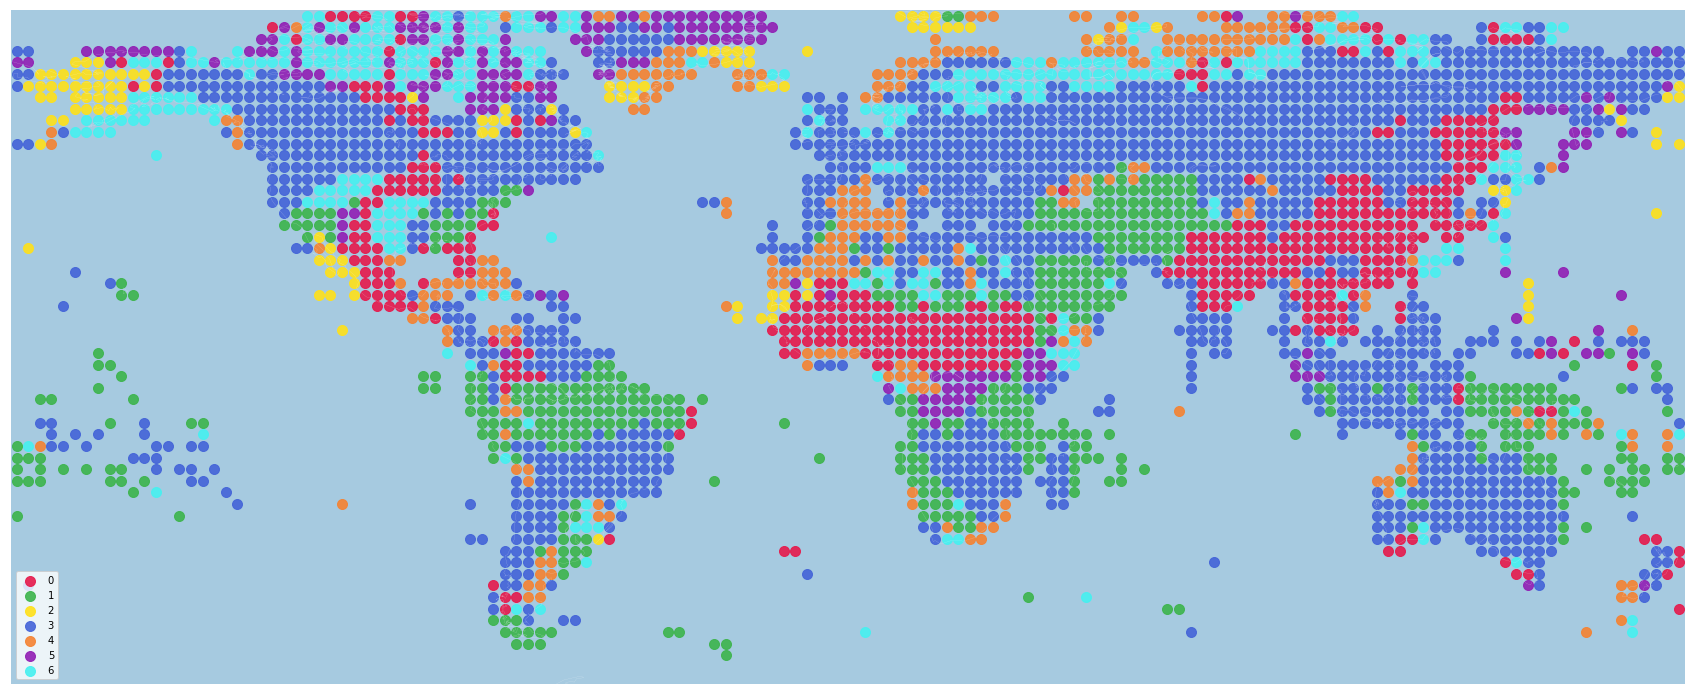

In [22]:
df_list = []
for j in range(n_components):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
#m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")

#colors = cm.rainbow(np.linspace(0, 0.5, n_components))
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
'#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
'#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

for i in range(n_components):
    values = df["clusters"].values  
    Idx = np.where(values == i)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=100, label = i, c= colors[i])

    
plt.legend()
plt.show()

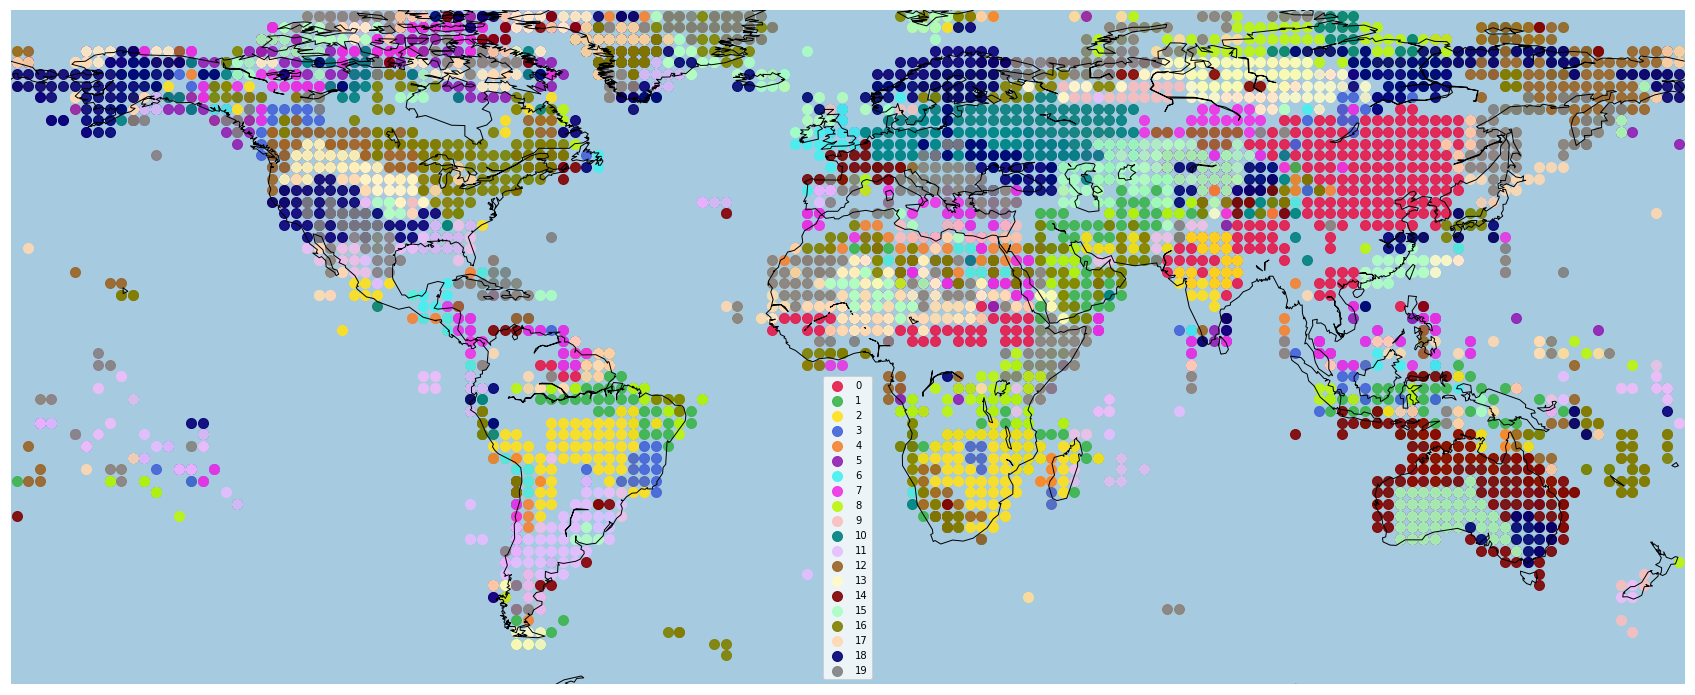

In [119]:
df_list = []
for j in range(n_components):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
#m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=1, color="black")

limit = 0.9

for i in range(n_components):
    values,Idx = pf.index_finder_percentile(loading,i, percentile= limit)
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=100, label = i, c = colors[i])

    
plt.legend()
plt.show()

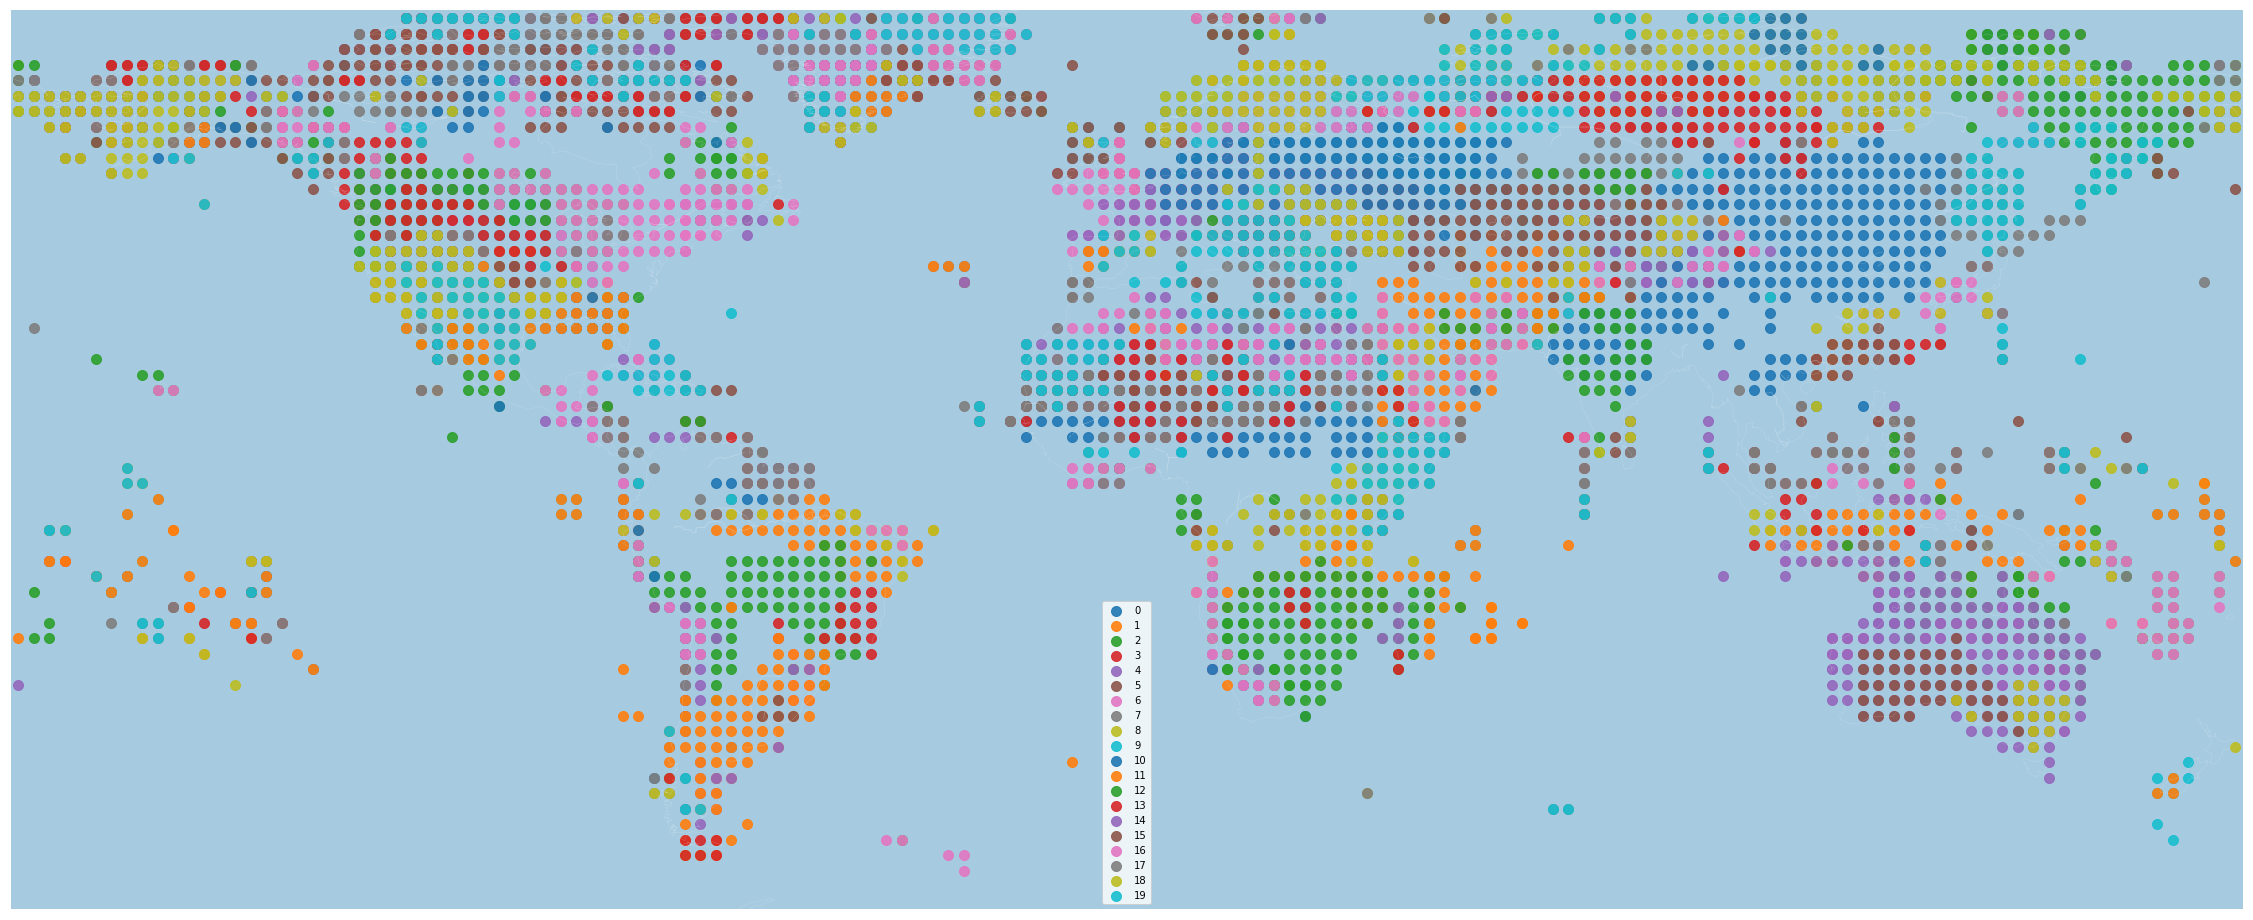

In [123]:
limit = 0.99

df_list = []
for j in range(n_components):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(40,20))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
#m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")

limit = 0.9

for i in range(n_components):
    values,Idx = pf.index_finder_percentile(loading,i, percentile= limit)
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=100, label = i)

    
plt.legend()
plt.show()
#plt.savefig("world_clusters.png")

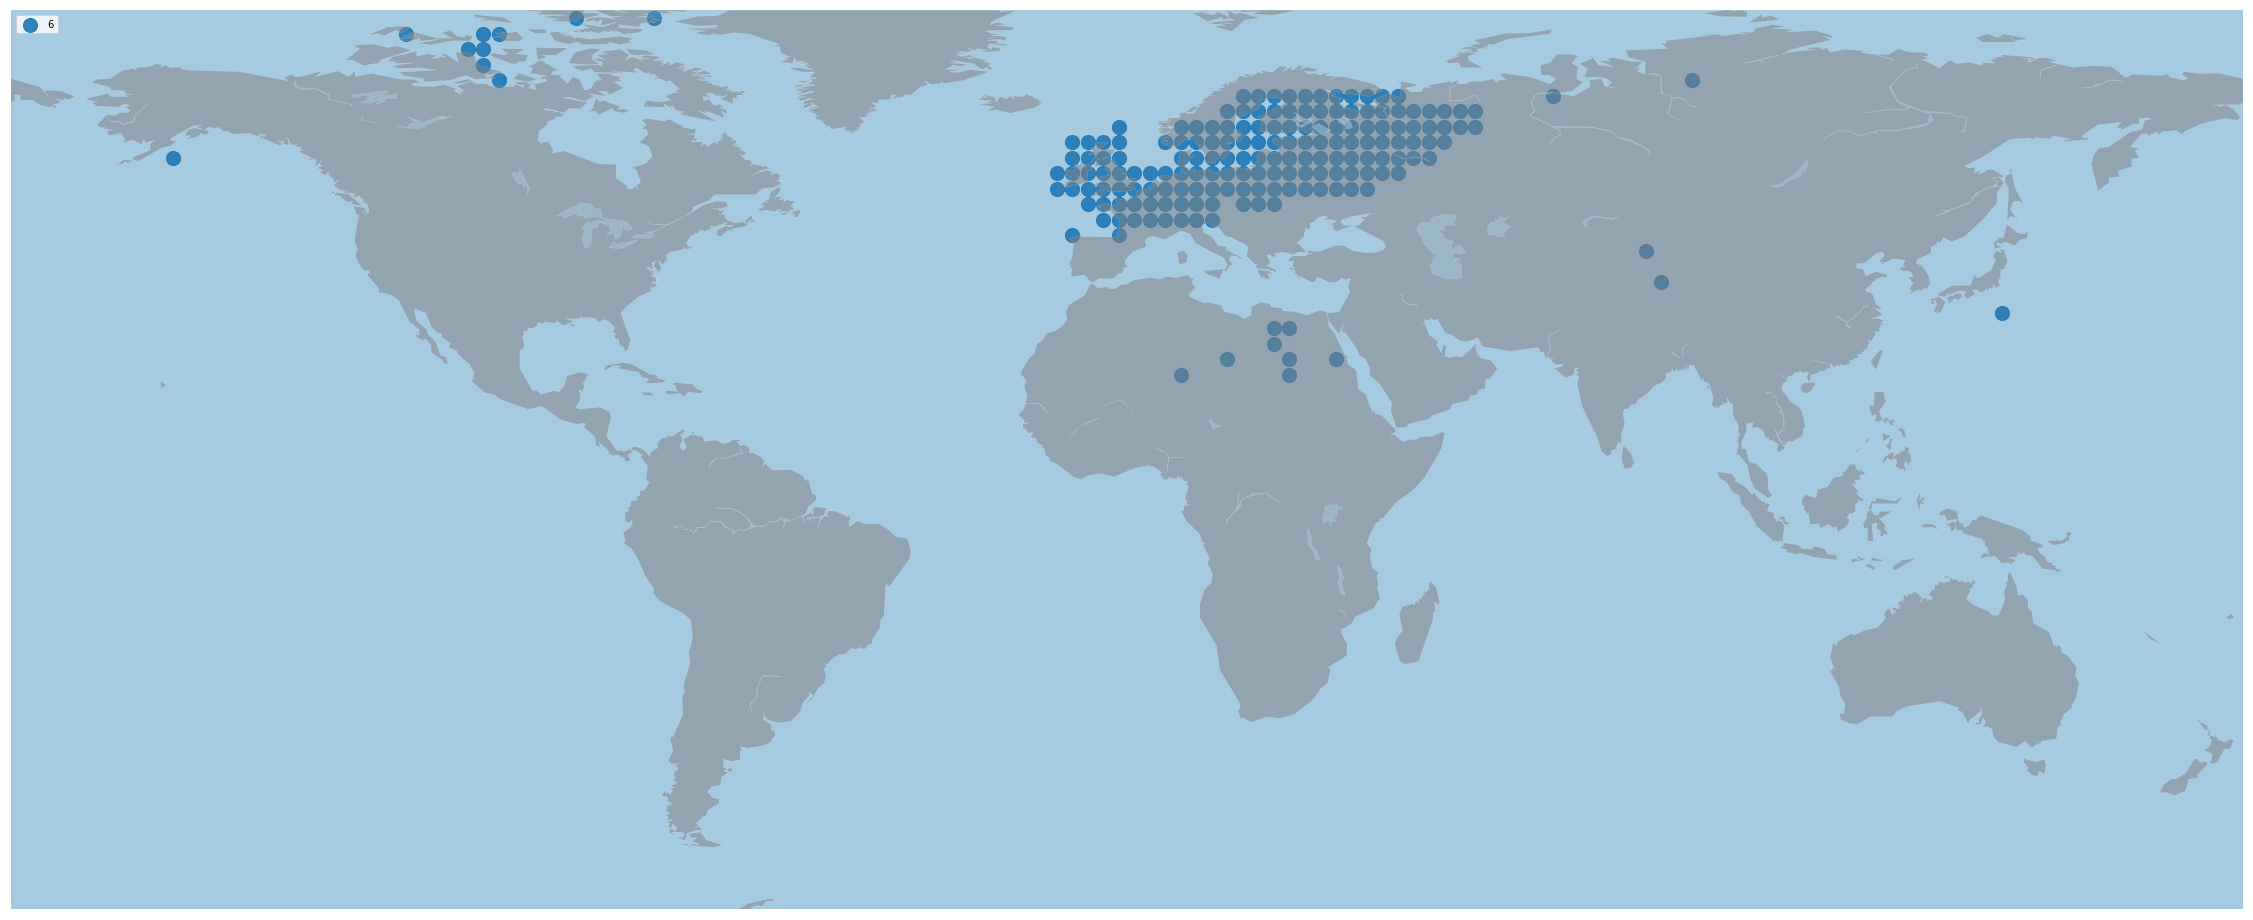

In [27]:
limit = 0.95

i = 6
df1 = pd.DataFrame(columns=df.columns)

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(40,20))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")

values,Idx = pf.index_finder_percentile(loading,i, percentile= limit)
df1 = df.iloc[Idx,:]
df1["values"] = values

lons = df1["lons"].values
lats = df1["lats"].values
x,y = m(lons, lats)
ax.scatter(x, y, alpha=0.9, s=200, label = i)

    
plt.legend()
plt.show()

In [ ]:
var_names = loading.columns
result = result.dot(loading)
result = np.matrix(result)

In [129]:
dataframe = pp.DataFrame(result,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [130]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 30 link(s):
        (0 -1): pval = 0.00000 | val = 0.600
        (2 -1): pval = 0.00000 | val = -0.321
        (2 0): pval = 0.00000 | val = -0.256
        (2 -2): pval = 0.00000 | val = -0.244
        (5 0): pval = 0.00000 | val = -0.232
        (1 0): pval = 0.00000 | val = -0.210
        (17 -1): pval = 0.00000 | val = -0.185
        (13 -1): pval = 0.00000 | val = -0.183
        (15 0): pval = 0.00000 | val = 0.179
        (17 0): pval = 0.00000 | val = 0.171
        (14 -2): pval = 0.00000 | val = 0.153
        (1 -1): pval = 0.00000 | val = 0.143
        (0 -2): pval = 0.00000 | val = -0.134
        (15 -1): pval = 0.00000 | val = -0.124
        (7 -2): pval = 0.00000 | val = 0.123
        (6 -1): pval = 0.00000 | val = -0.119
        (5 -1): pval = 0.00001 | val = 0.117
        (10 0): pval = 0.00002 | val = -0.111
        (13 0): pval = 0.00003 | val = 0.108
        (1 -2): pval = 0.00021 | val = -0.096
        (18 0): 

In [131]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable 0 has 25 link(s):
        (0 -1): pval = 0.00000 | qval = 0.00000 | val = 0.600
        (2 -1): pval = 0.00000 | qval = 0.00000 | val = -0.321
        (2 0): pval = 0.00000 | qval = 0.00000 | val = -0.256
        (2 -2): pval = 0.00000 | qval = 0.00000 | val = -0.244
        (5 0): pval = 0.00000 | qval = 0.00000 | val = -0.232
        (1 0): pval = 0.00000 | qval = 0.00000 | val = -0.210
        (17 -1): pval = 0.00000 | qval = 0.00000 | val = -0.185
        (13 -1): pval = 0.00000 | qval = 0.00000 | val = -0.183
        (15 0): pval = 0.00000 | qval = 0.00000 | val = 0.179
        (17 0): pval = 0.00000 | qval = 0.00000 | val = 0.171
        (14 -2): pval = 0.00000 | qval = 0.00000 | val = 0.153
        (1 -1): pval = 0.00000 | qval = 0.00000 | val = 0.143
        (0 -2): pval = 0.00000 | qval = 0.00000 | val = -0.134
        (15 -1): pval = 0.00000 | qval = 0.00002 | val = -0.124
        (7 -2): pval = 0.00000 | qval = 0.00002 | v

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0d7a05fd0>)

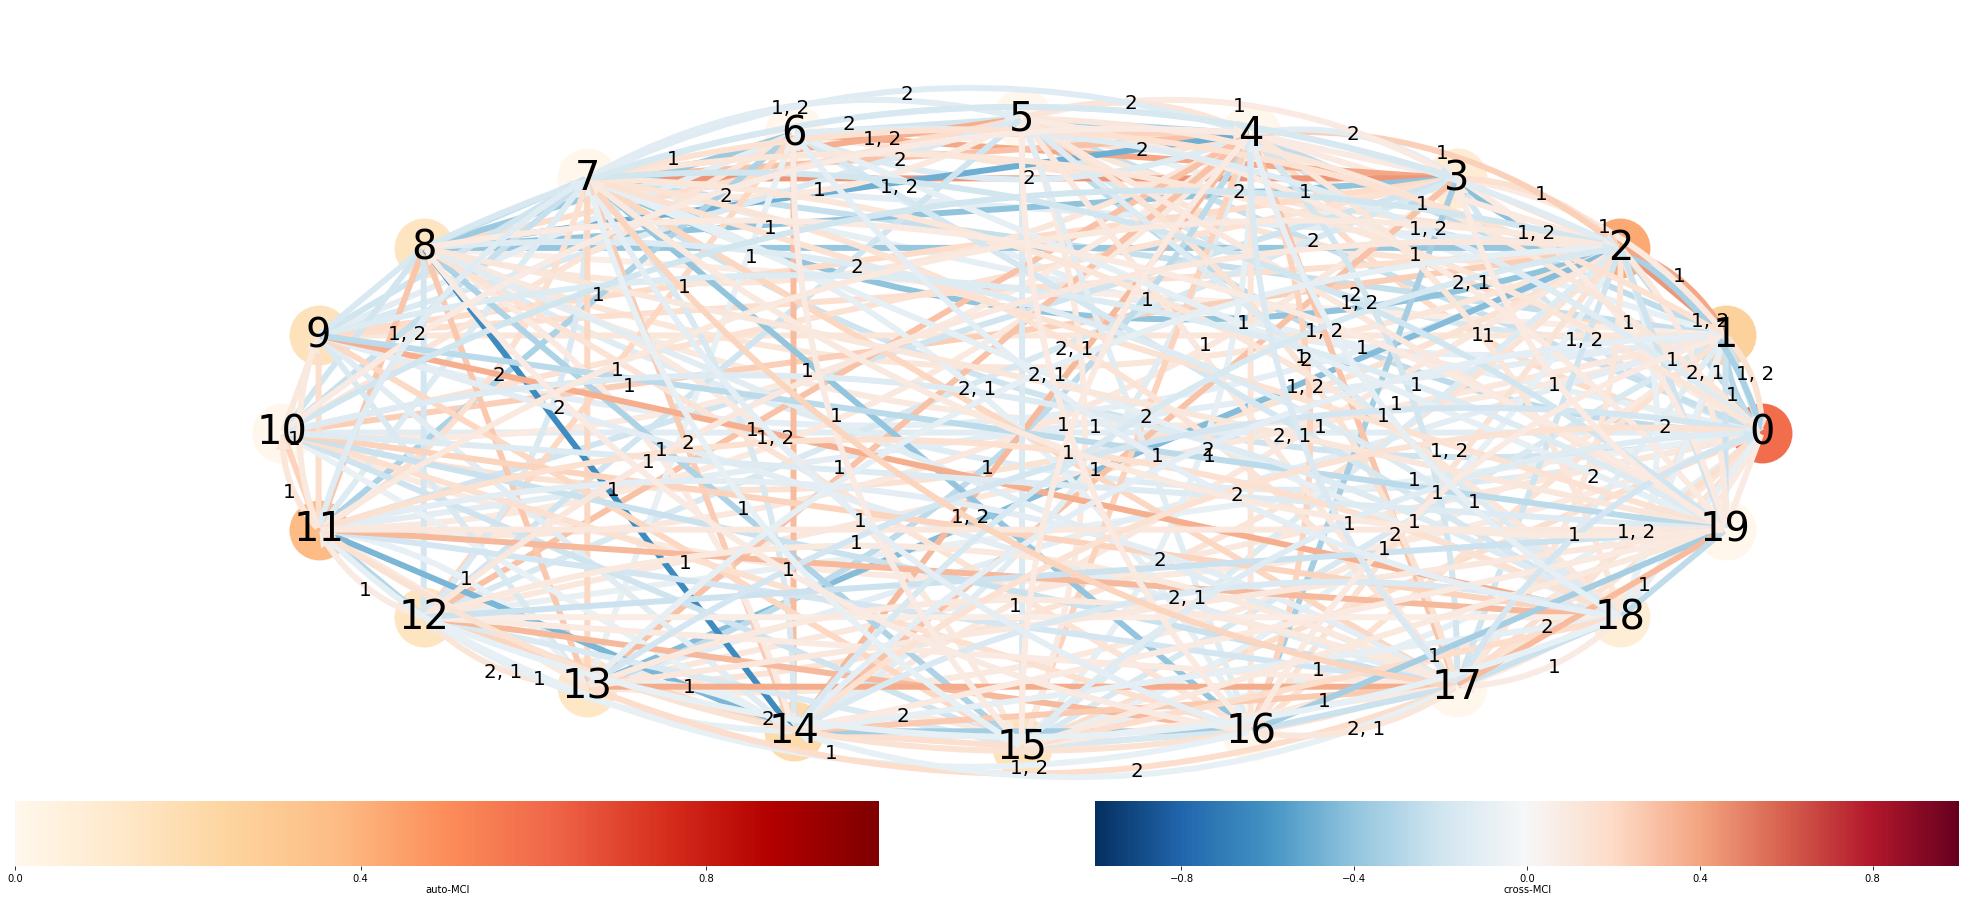

In [132]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 20,
    node_size = 60
    )

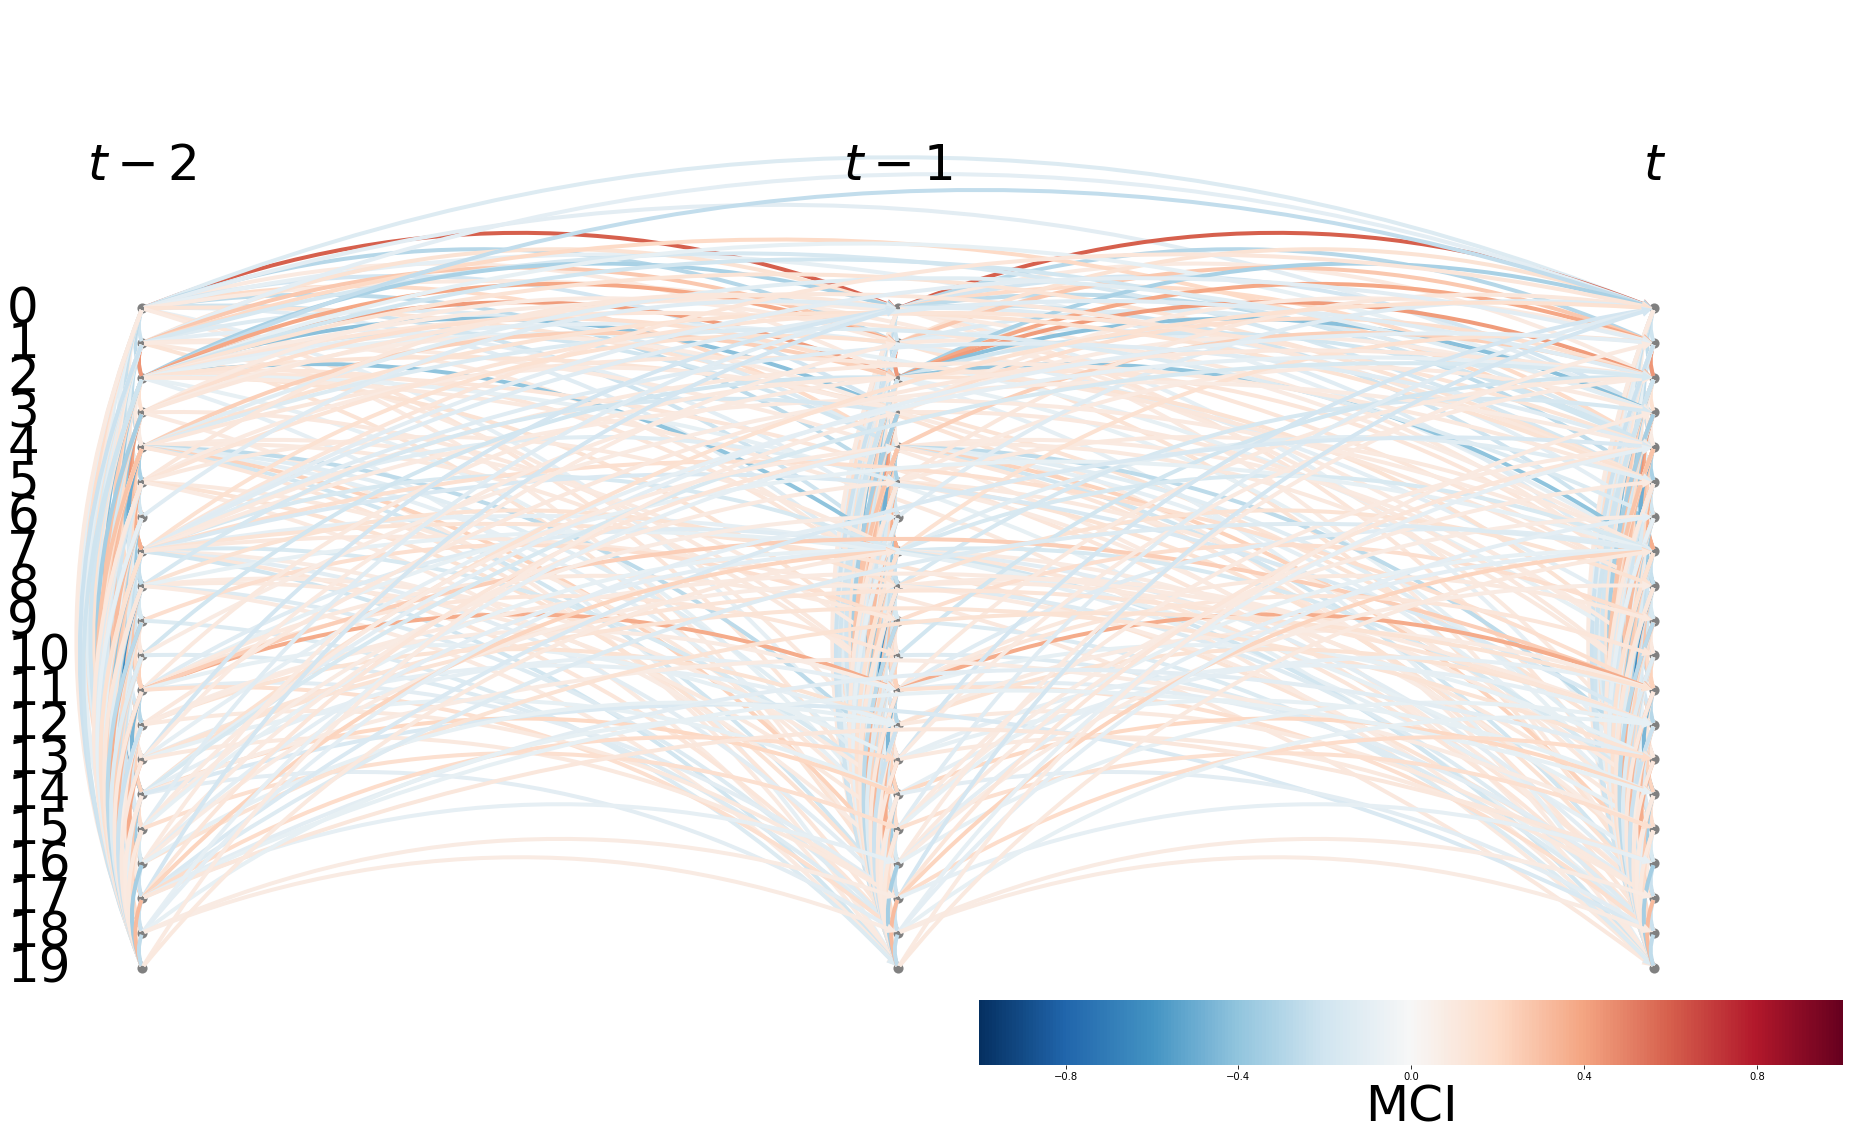

In [133]:
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='MCI',figsize=(30,15),
    node_label_size=100,
    label_fontsize = 50
    )

In [ ]:
lons = df["lons"].values
lats = df["lats"].values
x,y = m(lons, lats)
plt.scatter(x, y, c=df["clusters"], s=50)
# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(df["clusters"])[0]
 
# Add a point per position
m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")

In [19]:
loading = np.matrix(loading)
data = np.matrix(data)

In [20]:
result = np.matmul(data,loading)

In [91]:
AR = np.load("AR.npy")

Text(0.5,1,'Autoregressive Levels')

/home/mathsys2/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:955: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


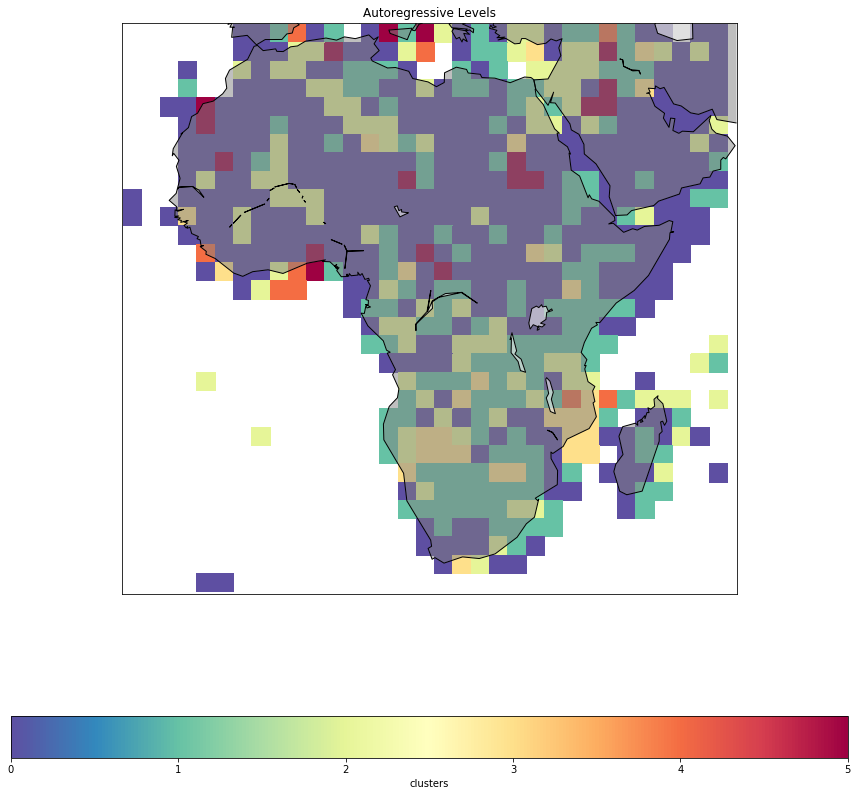

In [92]:
lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon, lat)
cs = m.pcolormesh(xx, yy, AR, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('clusters')
plt.title("Autoregressive Levels")

In [31]:
AR = np.load("AR.npy")

In [34]:
#ar_flip = np.flip(AR,axis=0)

Text(0.5,1,'Autoregressive Levels')

/home/mathsys2/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:955: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


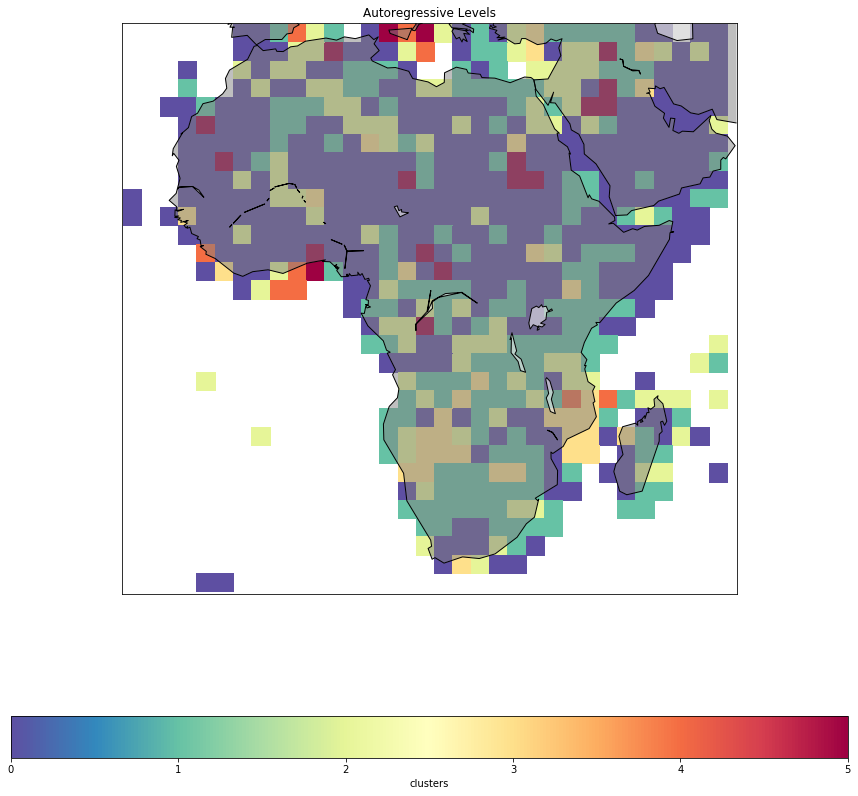

In [47]:
lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon, lat)
cs = m.pcolormesh(xx, yy, AR, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('clusters')
plt.title("Autoregressive Levels")